In [1]:
import re

# Lexer
class Lexer:
    def __init__(self, text):
        self.text = text
        self.pos = 0
        self.current_char = self.text[self.pos]

    def error(self):
        raise Exception('Invalid character')

    def advance(self):
        self.pos += 1
        if self.pos > len(self.text) - 1:
            self.current_char = None
        else:
            self.current_char = self.text[self.pos]

    def skip_whitespace(self):
        while self.current_char is not None and self.current_char.isspace():
            self.advance()

    def number(self):
        result = ''
        while self.current_char is not None and self.current_char.isdigit():
            result += self.current_char
            self.advance()
        return int(result)

    def get_next_token(self):
        while self.current_char is not None:
            if self.current_char.isspace():
                self.skip_whitespace()
                continue
            if self.current_char.isdigit():
                return ('NUMBER', self.number())
            if self.current_char == '+':
                self.advance()
                return ('PLUS', '+')
            if self.current_char == '-':
                self.advance()
                return ('MINUS', '-')
            if self.current_char == '*':
                self.advance()
                return ('MUL', '*')
            if self.current_char == '/':
                self.advance()
                return ('DIV', '/')
            if self.current_char == '(':
                self.advance()
                return ('LPAREN', '(')
            if self.current_char == ')':
                self.advance()
                return ('RPAREN', ')')
            self.error()
        return ('EOF', None)

# Parser (simplified for demonstration)
class Parser:
    def __init__(self, lexer):
        self.lexer = lexer
        self.current_token = self.lexer.get_next_token()

    def error(self):
        raise Exception('Invalid syntax')

    def parse(self):
        result = self.expr()
        if self.current_token[0] != 'EOF':
            self.error()
        return result

    def expr(self):
        node = self.term()
        while self.current_token[0] in ('PLUS', 'MINUS'):
            token = self.current_token
            self.current_token = self.lexer.get_next_token()
            node = (token, node, self.term())
        return node

    def term(self):
        node = self.factor()
        while self.current_token[0] in ('MUL', 'DIV'):
            token = self.current_token
            self.current_token = self.lexer.get_next_token()
            node = (token, node, self.factor())
        return node

    def factor(self):
        token = self.current_token
        if token[0] == 'NUMBER':
            self.current_token = self.lexer.get_next_token()
            return token
        elif token[0] == 'LPAREN':
            self.current_token = self.lexer.get_next_token()
            node = self.expr()
            if self.current_token[0] != 'RPAREN':
                self.error()
            self.current_token = self.lexer.get_next_token()
            return node
        self.error()

# Example Usage
text = "3 + 5 * (2 - 1)"
lexer = Lexer(text)
parser = Parser(lexer)
result = parser.parse()
print(result)  # Outputs a parse tree or syntax structure


(('PLUS', '+'), ('NUMBER', 3), (('MUL', '*'), ('NUMBER', 5), (('MINUS', '-'), ('NUMBER', 2), ('NUMBER', 1))))


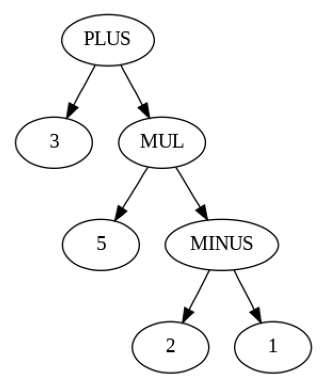

In [2]:
!pip install graphviz
!pip install pillow
from graphviz import Digraph
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Create a new directed graph
dot = Digraph()

# Add nodes for each part of the expression
dot.node('A', 'PLUS')       # Root node for the PLUS operator
dot.node('B', '3')          # Left child of PLUS (the number 3)
dot.node('C', 'MUL')        # Right child of PLUS (MUL operator)
dot.node('D', '5')          # Left child of MUL (the number 5)
dot.node('E', 'MINUS')      # Right child of MUL (MINUS operator)
dot.node('F', '2')          # Left child of MINUS (the number 2)
dot.node('G', '1')          # Right child of MINUS (the number 1)

# Connect the nodes to create the tree structure
dot.edge('A', 'B')  # Connect PLUS to 3
dot.edge('A', 'C')  # Connect PLUS to MUL
dot.edge('C', 'D')  # Connect MUL to 5
dot.edge('C', 'E')  # Connect MUL to MINUS
dot.edge('E', 'F')  # Connect MINUS to 2
dot.edge('E', 'G')  # Connect MINUS to 1

# Save the image as PNG
output_path = 'parse_tree'
dot.render(output_path, format='png')

# Load and display the image using matplotlib
img = mpimg.imread(f'{output_path}.png')
plt.imshow(img)
plt.axis('off')  # Hide axis
plt.show()
